# Dimensionality Reduction

Dimensionality reduction refers to reducing the number of features in a dataset in such a way that the overall performance of the algorithms trained on the dataset is minimally affected. With this technique, the training time of the model will be significantly decrease and visualizations will be much easier. 

## Principal Component Analysis

- Unsupervised Learning
- It prioritizes features on the basis of their ability to cause maximum variance in the output

### Pros

- Correlated features can be detected and removed using PCA.
- Reduces overfittingb bc of a reduction in the number of features. 
- Model training can be expedited. 

### Cons

- You need to standardize the data before you apply PCA. 
- Independent variable becomes less integrable. 
- Some amount of is loss when you reduce features. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prep
%matplotlib inline

In [4]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X = iris_df.drop(["species"],axis=1)
y = iris_df.filter(["species"],axis=1)
X.head(),y.head()

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
   species
 0  setosa
 1  setosa
 2  setosa
 3  setosa
 4  setosa)

In [29]:
le = prep.LabelEncoder()
y = le.fit_transform(y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [31]:
ss = prep.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape, X_test.shape

((120, 2), (30, 2))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8666666666666667


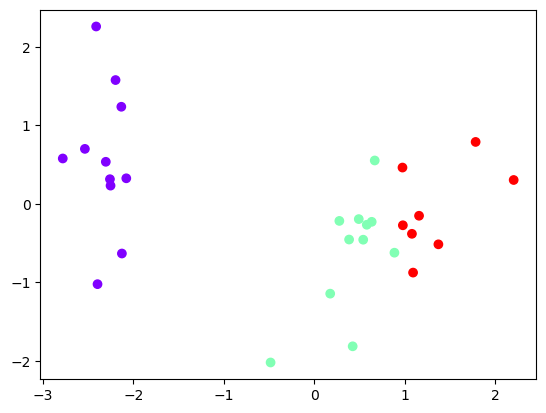

In [34]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap="rainbow")

## Linear Discriminant Analysis

- Supervised Learning Technique
- the data points are projected to a new dimensions
- the distance btw the clusters is maxmized and the btw the points within a cluster is minimized. 

### Pros

- reduce overfitting. 
- model training can be expedited. 

### Cons

- Not able to detect correlated features. 
- Cannot be used with unsupervised or unlabeld data.
- Some amount of is loss when you reduce features.

In [39]:
# "C:\Users\luyil\Downloads\banknote+authentication\data_banknote_authentication.csv"

data = pd.read_csv(r"C:\Users\luyil\Downloads\banknote+authentication\data_banknote_authentication.csv")
data.columns = ["variance","skewness","curtosis","entropy","class"]
X = data.drop(["class"],axis=1)
y = data.filter(["class"],axis=1)
X.head(),y.head()

(   variance  skewness  curtosis  entropy
 0   4.54590    8.1674   -2.4586 -1.46210
 1   3.86600   -2.6383    1.9242  0.10645
 2   3.45660    9.5228   -4.0112 -3.59440
 3   0.32924   -4.4552    4.5718 -0.98880
 4   4.36840    9.6718   -3.9606 -3.16250,
    class
 0      0
 1      0
 2      0
 3      0
 4      0)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [41]:
ss = prep.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
X_train.shape, X_test.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1096, 1), (275, 1))

In [44]:
var_ratios = lda.explained_variance_ratio_
var_ratios

array([1.])

In [46]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
X_train.shape, X_test.shape

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1096, 1), (275, 1))

In [47]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9818181818181818


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation via Validation Curve

In [77]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

train_size,train_scores,test_scores = learning_curve(
    RandomForestClassifier(),
    X,y,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.01,1,100),
    verbose=1
)

[learning_curve] Training set sizes: [  9  18  27  36  45  54  63  73  82  91 100 109 118 127 137 146 155 164
 173 182 191 201 210 219 228 237 246 255 265 274 283 292 301 310 319 329
 338 347 356 365 374 383 393 402 411 420 429 438 447 457 466 475 484 493
 502 511 520 530 539 548 557 566 575 584 594 603 612 621 630 639 648 658
 667 676 685 694 703 712 722 731 740 749 758 767 776 786 795 804 813 822
 831 840 850 859 868 877 886 895 904 914]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.4s finished


In [78]:
train_mean = np.mean(train_scores,axis=1)
train_mean

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [79]:
test_mean = np.mean(test_scores,axis=1)
test_mean

array([0.38314181, 0.44179882, 0.46022753, 0.43832452, 0.45237493,
       0.46291657, 0.45852678, 0.51272121, 0.51360224, 0.5153413 ,
       0.52060829, 0.50485712, 0.51974642, 0.52849153, 0.54074542,
       0.5363518 , 0.52760668, 0.48917107, 0.41034245, 0.49176435,
       0.49702367, 0.48999847, 0.49354555, 0.50406803, 0.50231747,
       0.49615031, 0.50931204, 0.50403739, 0.50663066, 0.50929671,
       0.52240481, 0.52327434, 0.5189037 , 0.51537195, 0.52763732,
       0.51188616, 0.53113844, 0.53025358, 0.52061978, 0.52761817,
       0.53113077, 0.53375086, 0.52585996, 0.53550142, 0.53024209,
       0.52060829, 0.52499808, 0.52934574, 0.51975408, 0.51978472,
       0.53024975, 0.51623765, 0.49966291, 0.49793534, 0.51804949,
       0.50928905, 0.51806098, 0.5119168 , 0.51714165, 0.51363671,
       0.53463955, 0.52585613, 0.52941086, 0.53901019, 0.53728262,
       0.54425419, 0.53462805, 0.52324753, 0.54161878, 0.51883092,
       0.52497127, 0.51094384, 0.50652724, 0.51175975, 0.51617

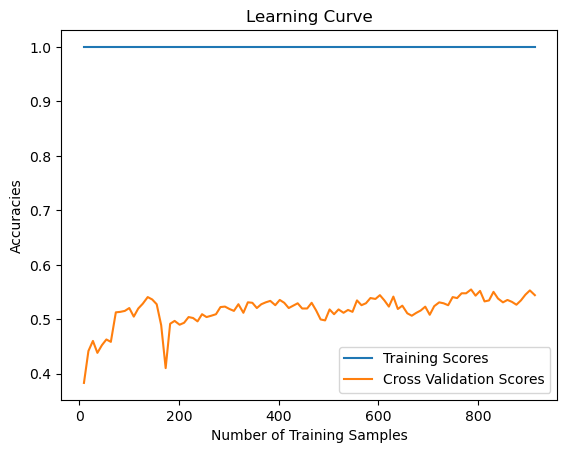

In [80]:
plt.plot(train_size,train_mean,label="Training Scores")
plt.plot(train_size,test_mean,label="Cross Validation Scores")

plt.title("Learning Curve")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracies")
plt.legend(loc="best")

## Single Value Decomposition

this algorithm can reduce a matrix into its constitunte components. 

### Pros
- Works better with sparse dataset, such as a text dataset. 
- Orders the features by relevance. 
- Extremely efficient for larger dataset. 

### Cons
- SVD is relatively slower and computationally difficult. 
- Difficult to visualize. 
- May not work well with high non-linear dataset. 

In [49]:
data = pd.read_csv(r"C:\Users\luyil\Downloads\archive (2)\WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [50]:
X = data.drop(["quality"],axis=1)
y = data.filter(["quality"],axis=1)
X.head(),y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  Id  
 0      9.4   0  
 1      9.8   1  
 2      9.8   2  


In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [52]:
ss = prep.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [53]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6593886462882096


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
X_train = svd.fit_transform(X_train,y_train)
X_test = svd.transform(X_test)
X_train.shape, X_test.shape

((914, 2), (229, 2))

In [55]:
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
y_pred = log_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5414847161572053


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Apply Cross-Validation

We can use cross validation to test our dataset:
- divide data into n parts. 
- in each iteration, we first use k_1 set as test set and other are training sets. 
- then we use k_2,k_3...k_n. 

We can perform this operation by using cross_val_score. 

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_clf,X,y,cv=5,scoring="neg_mean_absolute_error")
scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

array([-0.56768559, -0.58951965, -0.58515284, -0.5877193 , -0.60964912])

In [57]:
scores.mean(), scores.std()

(-0.5879452999310504, 0.013355443022193875)

### Notes
- we prefer using k-fold cross validation for model selection, bc sometimes one model performs better on one subset. 

## Hyperparameters Selections

Hyperparameters in machine learning models are extremely important. In sklearn, we can use an algorithm called Grid Search Algorithm. For this algorithm, we need first create a dictionary of parameters and then we use this algorithm to try all possible combinations within these parameters, and return the best one. 

In [66]:
# dictionary of parameters
grid_params = {
    "n_estimators":[100,300,500,600,700],
    "min_samples_leaf":[1,3,5],
    "bootstrap":[True,False],
    "criterion":["absolute_error"]
}

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42,n_estimators=500)

In [68]:
from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(
    estimator=rf_reg,
    param_grid=grid_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

In [69]:
gd_sr.fit(X,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=500, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['absolute_error'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 300, 500, 600, 700]},
             scoring='neg_mean_absolute_error')

In [70]:
best_params = gd_sr.best_params_
best_params

{'bootstrap': True,
 'criterion': 'absolute_error',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [71]:
best_score = gd_sr.best_score_
best_score

-0.5720893434459511

### Save Model for Later Use

In [82]:
import pickle
file_name = r"C:\Users\luyil\learn-sklearn\model.sav"
pickle.dump(log_clf,open(file_name,"wb"))

In [ ]:
loaded_model = pickle.load(open(file_name,"wb"))
y_pred = loaded_model.predict(X_test)

In [ ]:
from sklearn import metrics

print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))